## This is the Maxwell part of the system, how to compute the density and then the potential, to finally compute the electric field.

In [5]:
using Plots
using FFTW
FFTW.set_provider!("mkl")


In [6]:
include("aux_functions.jl")

get_index_and_distance (generic function with 1 method)

We try a density and compute the potential. Then check it is working

In [17]:
J = 128
L = 3.
dx = L/J
κ = 2π/L
x = [dx*(i-1) for i in 1:J]
ω = 5
v = sin.(κ*ω*x) + 3. * cos.(κ*4*ω*x)
ϕe = -(κ *ω )^(-2)*(sin.(κ*ω*x) + 3.0/4/4 * cos.(κ*4*ω*x))
u = zeros(J)
ϕ = Poisson1D!(u,v,κ);

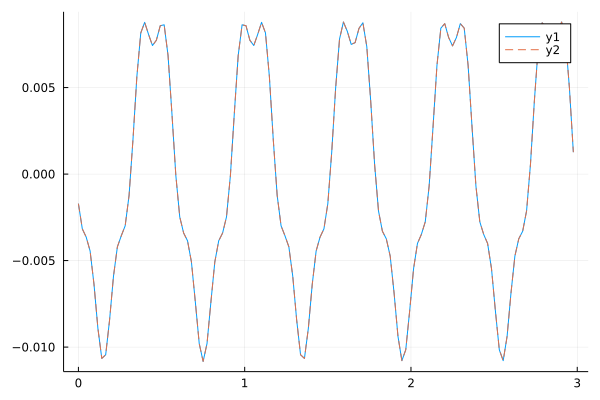

In [19]:
plot(x,ϕ)
plot!(x,ϕe ,ls=:dash)

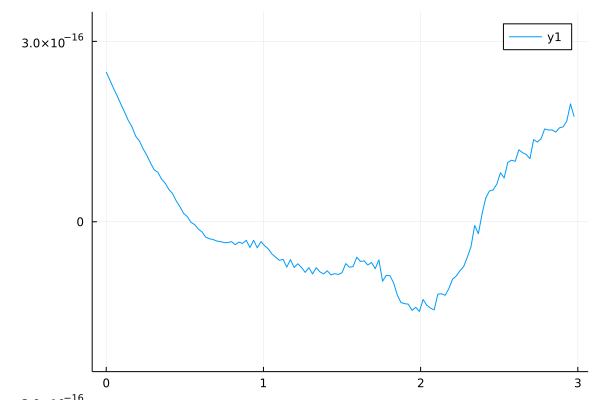

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/reula/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294


In [20]:
plot(x, ϕ - ϕe)

We also check what the FFT is doing...

In [21]:
J = 128
#J = 1028
L = 3.
dx = L/J
κ = 2π/L
x = [dx*(i-1) for i in 1:J]
ω = 5
v = sin.(κ*ω*x) + cos.(κ*ω*4*x)
V = rfft(v);


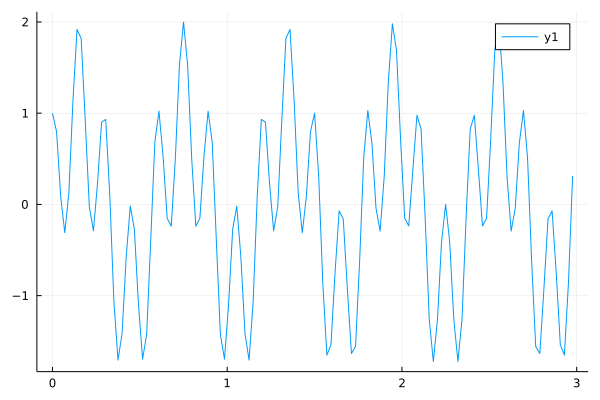

In [22]:
plot(x,v)

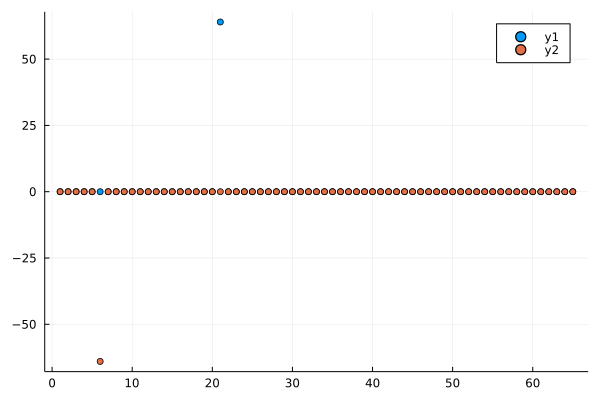

In [23]:
scatter(real.(V))
scatter!(imag.(V))
#plot!(x, imag.(V))
#plot(x,v)


In [24]:
vv = irfft(V,J);

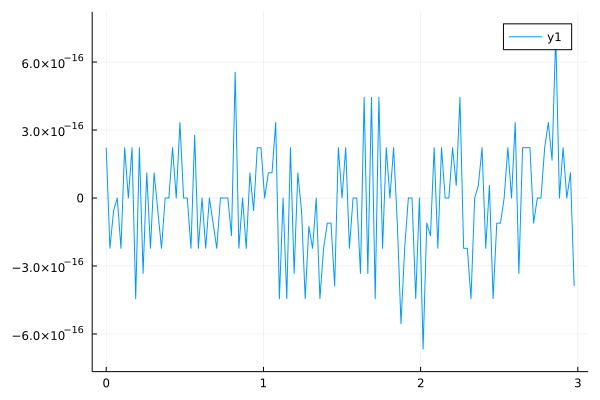

In [25]:
plot(x, v-vv)

Finally we check that the Electric field is computed correctly.

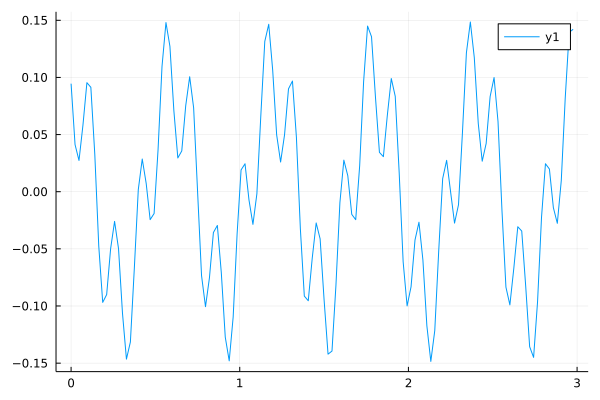

In [28]:
E = zeros(J)
Electric!(ϕ, E, dx)
plot(x,E)